In [25]:
import pandas as pd
import matplotlib.pyplot as plt  # Corrected import
import seaborn as sns

In [36]:
import pandas as pd
import plotly.express as px

# Load the data
data = pd.read_csv('../CSV/csv_10_wines.csv')

# Melt the DataFrame to long format
data_long = pd.melt(data, id_vars='wine_name', value_vars=['ratings_count', 'ratings_average'],
                    var_name='Metric', value_name='Value')

fig = px.bar(data_long, x='wine_name', y='Value', color='Metric',
             labels={'wine_name': 'Wine Name', 'Value': 'Ratings'},
             title='Comparison of Rating Count and Rating Average by Wine')

# Show the chart
fig.show()


In [17]:
import sqlite3
import pandas as pd

# Step 1: Connect to the database (for SQLite)
conn = sqlite3.connect('../DB/vivino.db')  # Replace with your actual database file

# Step 2: Execute the SQL query and load into DataFrame
query = """
SELECT grape_id,
       COUNT(DISTINCT country_code) AS country_count,
       wines_count,
       grapes.name
FROM most_used_grapes_per_country
JOIN grapes ON grapes.id = most_used_grapes_per_country.grape_id
GROUP BY grape_id
ORDER BY country_count DESC
LIMIT 6;
"""

# Execute the query and load the result into a DataFrame
df = pd.read_sql_query(query, conn)

# Step 3: Close the connection
conn.close()

# Display the DataFrame
print(df)


   grape_id  country_count  wines_count                name
0         2             12       801751  Cabernet Sauvignon
1        10             11       566719              Merlot
2         5              6       604208          Chardonnay
3        14              3       572334          Pinot Noir
4         1              3       551112        Shiraz/Syrah
5       632              1         4122         Plavac Mali


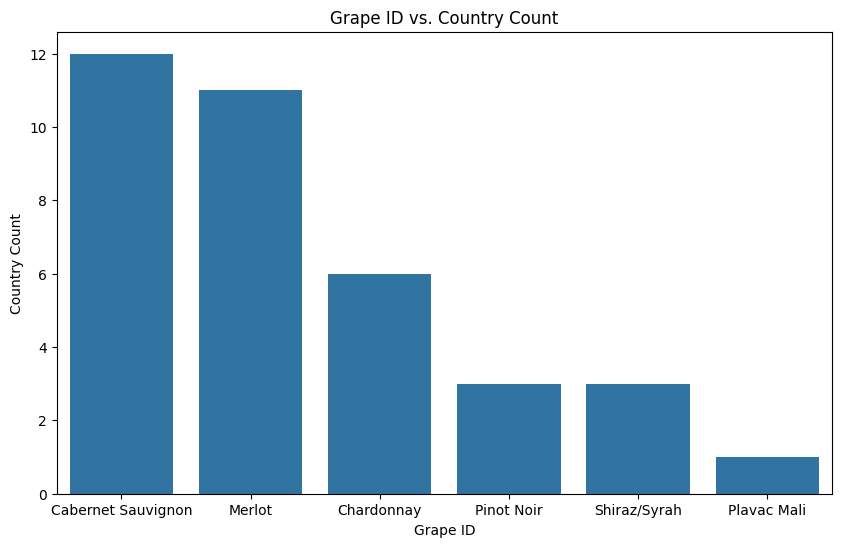

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create the DataFrame by reading the CSV data
data = df

# Step 2: Plotting the bar chart
plt.figure(figsize=(10, 6))

sns.barplot(x='name', y='country_count', data=data,order=data['name'])
plt.title('Grape ID vs. Country Count')
plt.xlabel('Grape ID')
plt.ylabel('Country Count')

# Display the plot
plt.show()
